In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


# EDA and Data Cleaning

In [2]:
bnb = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
bnb.head(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [3]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
bnb['host_name'].value_counts()

host_name
Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: count, Length: 11452, dtype: int64

In [5]:
bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
bnb.drop(['id', 'name', 'last_review', 'reviews_per_month'], axis = 1, inplace = True)
bnb.head(8)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
5,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
6,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0
7,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220


In [7]:
bnb['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

In [8]:
bnb['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [9]:
bnb['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

It seems like the neighbourhood contains places that are subsets of the neighbhourhood_group feature (ex: Brooklyn(neighbhourhood_group) contains Kensington and Clinton Hill (neighbourhoods), etc...)

I have an idea of combining them togather to reduce dimensionality

In [10]:
bnb['area'] = bnb['neighbourhood'] + ", " + bnb['neighbourhood_group']

bnb['area'][:30]

0             Kensington, Brooklyn
1               Midtown, Manhattan
2                Harlem, Manhattan
3           Clinton Hill, Brooklyn
4           East Harlem, Manhattan
5           Murray Hill, Manhattan
6     Bedford-Stuyvesant, Brooklyn
7        Hell's Kitchen, Manhattan
8       Upper West Side, Manhattan
9             Chinatown, Manhattan
10      Upper West Side, Manhattan
11       Hell's Kitchen, Manhattan
12           South Slope, Brooklyn
13      Upper West Side, Manhattan
14         West Village, Manhattan
15          Williamsburg, Brooklyn
16           Fort Greene, Brooklyn
17              Chelsea, Manhattan
18         Crown Heights, Brooklyn
19          East Harlem, Manhattan
20          Williamsburg, Brooklyn
21            Park Slope, Brooklyn
22            Park Slope, Brooklyn
23            Park Slope, Brooklyn
24    Bedford-Stuyvesant, Brooklyn
25       Windsor Terrace, Brooklyn
26               Inwood, Manhattan
27       Hell's Kitchen, Manhattan
28               Inw

In [11]:
bnb['area'].value_counts()

area
Williamsburg, Brooklyn           3920
Bedford-Stuyvesant, Brooklyn     3714
Harlem, Manhattan                2658
Bushwick, Brooklyn               2465
Upper West Side, Manhattan       1971
                                 ... 
Fort Wadsworth, Staten Island       1
Richmondtown, Staten Island         1
New Dorp, Staten Island             1
Rossville, Staten Island            1
Willowbrook, Staten Island          1
Name: count, Length: 221, dtype: int64

In [12]:
from matplotlib import pyplot as plt

In [13]:
bnb['area'].value_counts().describe()

count     221.000000
mean      221.244344
std       536.160961
min         1.000000
25%        10.000000
50%        32.000000
75%       154.000000
max      3920.000000
Name: count, dtype: float64

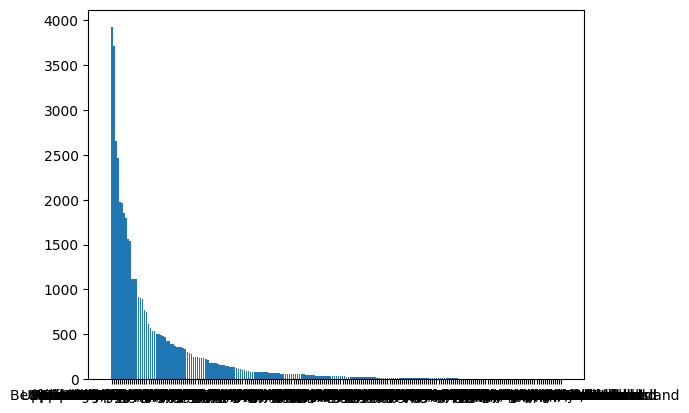

In [14]:
plt.bar(bnb['area'].value_counts().index, bnb['area'].value_counts())
plt.show()

In [15]:
# Let's check the dataframe once again!
bnb.head(8)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,area
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,"Kensington, Brooklyn"
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,"Midtown, Manhattan"
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,"Harlem, Manhattan"
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,"Clinton Hill, Brooklyn"
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,"East Harlem, Manhattan"
5,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,"Murray Hill, Manhattan"
6,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0,"Bedford-Stuyvesant, Brooklyn"
7,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,1,220,"Hell's Kitchen, Manhattan"


In [16]:
# I think we can drop the host names and keep Ids instead so that no two hosts with the same name confuse the model

bnb.drop(['host_name', 'neighbourhood_group', 'neighbourhood'], axis = 1, inplace = True)
bnb.head(7)

,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,area
0,2787,40.64749,-73.97237,Private room,149,1,9,6,365,"Kensington, Brooklyn"
1,2845,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,"Midtown, Manhattan"
2,4632,40.80902,-73.94190,Private room,150,3,0,1,365,"Harlem, Manhattan"
3,4869,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,"Clinton Hill, Brooklyn"
4,7192,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,"East Harlem, Manhattan"
5,7322,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,"Murray Hill, Manhattan"
6,7356,40.68688,-73.95596,Private room,60,45,49,1,0,"Bedford-Stuyvesant, Brooklyn"


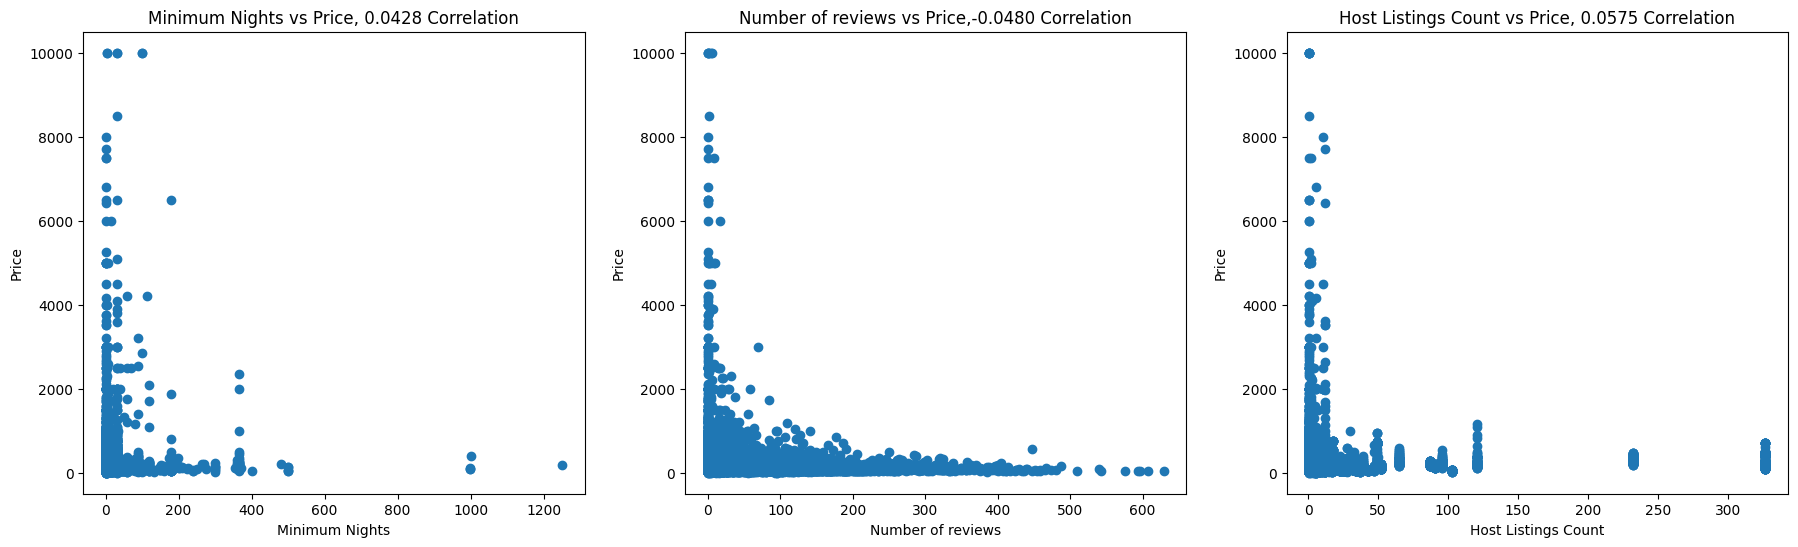

In [17]:
# I think we should check if there's a correlation between ('minimum_nights', 'number_of_reviews', 'calculated_host_listings_count')

min_nights_cor = np.corrcoef(bnb['minimum_nights'], bnb['price'])
num_reviews_cor = np.corrcoef(bnb['number_of_reviews'], bnb['price'])
host_listing_cor = np.corrcoef(bnb['calculated_host_listings_count'], bnb['price'])

fig, axs = plt.subplots(1, 3, figsize= (22, 6))  # 1 row, 3 columns

axs[0].scatter(bnb['minimum_nights'], bnb['price'])
axs[0].set_title(f"Minimum Nights vs Price,{min_nights_cor[0, 1]: .4f} Correlation")
axs[0].set_xlabel('Minimum Nights')
axs[0].set_ylabel('Price')


axs[1].scatter(bnb['number_of_reviews'], bnb['price'])
axs[1].set_title(f"Number of reviews vs Price,{num_reviews_cor[0, 1]: .4f} Correlation")
axs[1].set_xlabel('Number of reviews')
axs[1].set_ylabel('Price')


axs[2].scatter(bnb['calculated_host_listings_count'], bnb['price'])
axs[2].set_title(f"Host Listings Count vs Price,{host_listing_cor[0, 1]: .4f} Correlation")
axs[2].set_xlabel('Host Listings Count')
axs[2].set_ylabel('Price')


plt.show()

**It appears that they have no direct correlation with the price, I think that's also partially because the prices it self isn't really spread out in values. I will use them in the model initially to see how it goes**

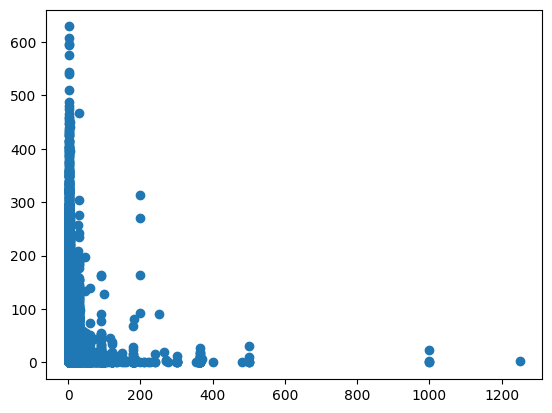

In [18]:
plt.scatter(bnb['minimum_nights'], bnb['number_of_reviews'])
plt.show()

In [19]:
bnb.head(6)

,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,area
0,2787,40.64749,-73.97237,Private room,149,1,9,6,365,"Kensington, Brooklyn"
1,2845,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,"Midtown, Manhattan"
2,4632,40.80902,-73.94190,Private room,150,3,0,1,365,"Harlem, Manhattan"
3,4869,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,"Clinton Hill, Brooklyn"
4,7192,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,"East Harlem, Manhattan"
5,7322,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,"Murray Hill, Manhattan"


In [20]:
bnb['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

**I definitely want to use one-hot encoding here on room type since there are only 3 categories**

In [21]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse_output = False)
rooms_encoded = onehot.fit_transform(bnb[['room_type']])
rooms_encoded[:35]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [22]:
encoded_df = pd.DataFrame(rooms_encoded, columns = onehot.get_feature_names_out(['room_type']))
encoded_df.head(10)

,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,1.0,0.0,0.0


In [23]:
bnb = pd.concat([bnb, encoded_df], axis = 1)
bnb.head(10)

,host_id,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,area,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,40.64749,-73.97237,Private room,149,1,9,6,365,"Kensington, Brooklyn",0.0,1.0,0.0
1,2845,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,"Midtown, Manhattan",1.0,0.0,0.0
2,4632,40.80902,-73.94190,Private room,150,3,0,1,365,"Harlem, Manhattan",0.0,1.0,0.0
3,4869,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,"Clinton Hill, Brooklyn",1.0,0.0,0.0
4,7192,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,"East Harlem, Manhattan",1.0,0.0,0.0
5,7322,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,"Murray Hill, Manhattan",1.0,0.0,0.0
6,7356,40.68688,-73.95596,Private room,60,45,49,1,0,"Bedford-Stuyvesant, Brooklyn",0.0,1.0,0.0
7,8967,40.76489,-73.98493,Private room,79,2,430,1,220,"Hell's Kitchen, Manhattan",0.0,1.0,0.0
8,7490,40.80178,-73.96723,Private room,79,2,118,1,0,"Upper West Side, Manhattan",0.0,1.0,0.0
9,7549,40.71344,-73.99037,Entire home/apt,150,1,160,4,188,"Chinatown, Manhattan",1.0,0.0,0.0


In [24]:
bnb.drop(['room_type'], axis = 1, inplace = True)
bnb.head(10)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,area,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2787,40.64749,-73.97237,149,1,9,6,365,"Kensington, Brooklyn",0.0,1.0,0.0
1,2845,40.75362,-73.98377,225,1,45,2,355,"Midtown, Manhattan",1.0,0.0,0.0
2,4632,40.80902,-73.94190,150,3,0,1,365,"Harlem, Manhattan",0.0,1.0,0.0
3,4869,40.68514,-73.95976,89,1,270,1,194,"Clinton Hill, Brooklyn",1.0,0.0,0.0
4,7192,40.79851,-73.94399,80,10,9,1,0,"East Harlem, Manhattan",1.0,0.0,0.0
5,7322,40.74767,-73.97500,200,3,74,1,129,"Murray Hill, Manhattan",1.0,0.0,0.0
6,7356,40.68688,-73.95596,60,45,49,1,0,"Bedford-Stuyvesant, Brooklyn",0.0,1.0,0.0
7,8967,40.76489,-73.98493,79,2,430,1,220,"Hell's Kitchen, Manhattan",0.0,1.0,0.0
8,7490,40.80178,-73.96723,79,2,118,1,0,"Upper West Side, Manhattan",0.0,1.0,0.0
9,7549,40.71344,-73.99037,150,1,160,4,188,"Chinatown, Manhattan",1.0,0.0,0.0


For area feature, since we have to many values to use one-hot encoding, I will use K-Fold Target Encoding

In [25]:
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits = k, shuffle = True, random_state = 42)

In [26]:
bnb['area_encoded'] = np.nan

# I chat GPTed this cell tbh :)
for train_idx, val_idx in kf.split(bnb):
    train, val = bnb.iloc[train_idx], bnb.iloc[val_idx]
    mean_encoded = train.groupby('area')['price'].mean()
    bnb.loc[val_idx, 'area_encoded'] = val['area'].map(mean_encoded)

In [27]:
bnb.head(10)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,area,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,area_encoded
0,2787,40.64749,-73.97237,149,1,9,6,365,"Kensington, Brooklyn",0.0,1.0,0.0,90.398551
1,2845,40.75362,-73.98377,225,1,45,2,355,"Midtown, Manhattan",1.0,0.0,0.0,277.916201
2,4632,40.80902,-73.94190,150,3,0,1,365,"Harlem, Manhattan",0.0,1.0,0.0,115.763219
3,4869,40.68514,-73.95976,89,1,270,1,194,"Clinton Hill, Brooklyn",1.0,0.0,0.0,189.224138
4,7192,40.79851,-73.94399,80,10,9,1,0,"East Harlem, Manhattan",1.0,0.0,0.0,135.230159
5,7322,40.74767,-73.97500,200,3,74,1,129,"Murray Hill, Manhattan",1.0,0.0,0.0,219.248718
6,7356,40.68688,-73.95596,60,45,49,1,0,"Bedford-Stuyvesant, Brooklyn",0.0,1.0,0.0,107.456923
7,8967,40.76489,-73.98493,79,2,430,1,220,"Hell's Kitchen, Manhattan",0.0,1.0,0.0,206.444656
8,7490,40.80178,-73.96723,79,2,118,1,0,"Upper West Side, Manhattan",0.0,1.0,0.0,210.267346
9,7549,40.71344,-73.99037,150,1,160,4,188,"Chinatown, Manhattan",1.0,0.0,0.0,158.442568


In [28]:
bnb.isnull().sum()

host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
area                              0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
area_encoded                      8
dtype: int64

In [29]:
# Let's fill the missing values in the encoded area feature

global_mean = bnb['price'].mean()
bnb['area_encoded'].fillna(global_mean, inplace=True)

/tmp/ipykernel_18/3253235868.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bnb['area_encoded'].fillna(global_mean, inplace=True)


In [30]:
bnb['area_encoded'].isnull().sum()

0

In [31]:
bnb.drop(['area'], axis = 1, inplace = True)
bnb.head(10)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,area_encoded
0,2787,40.64749,-73.97237,149,1,9,6,365,0.0,1.0,0.0,90.398551
1,2845,40.75362,-73.98377,225,1,45,2,355,1.0,0.0,0.0,277.916201
2,4632,40.80902,-73.94190,150,3,0,1,365,0.0,1.0,0.0,115.763219
3,4869,40.68514,-73.95976,89,1,270,1,194,1.0,0.0,0.0,189.224138
4,7192,40.79851,-73.94399,80,10,9,1,0,1.0,0.0,0.0,135.230159
5,7322,40.74767,-73.97500,200,3,74,1,129,1.0,0.0,0.0,219.248718
6,7356,40.68688,-73.95596,60,45,49,1,0,0.0,1.0,0.0,107.456923
7,8967,40.76489,-73.98493,79,2,430,1,220,0.0,1.0,0.0,206.444656
8,7490,40.80178,-73.96723,79,2,118,1,0,0.0,1.0,0.0,210.267346
9,7549,40.71344,-73.99037,150,1,160,4,188,1.0,0.0,0.0,158.442568


In [32]:
bnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,area_encoded
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.519665,0.456611,0.023724,152.667209
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.499618,0.498119,0.152190,62.584674
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,107.456923
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,0.000000,0.000000,142.609539
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,0.000000,192.511236
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,1.000000,1.000000,1.000000,749.000000


In [33]:
host = bnb.describe()['host_id']
host

count    4.889500e+04
mean     6.762001e+07
std      7.861097e+07
min      2.438000e+03
25%      7.822033e+06
50%      3.079382e+07
75%      1.074344e+08
max      2.743213e+08
Name: host_id, dtype: float64

In [34]:
# since this Id values are significantly different than the rest, I will normalize them

def normalize(x):
    m = host['mean']
    std = host['std']
    
    return ((x - m) / std)

bnb['host_id'] = bnb['host_id'].map(normalize)

bnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,area_encoded
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.000000,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.519665,0.456611,0.023724,152.667209
std,1.000000,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.499618,0.498119,0.152190,62.584674
min,-0.860154,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,-0.760682,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,107.456923
50%,-0.468461,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,0.000000,0.000000,142.609539
75%,0.506474,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,0.000000,192.511236
max,2.629421,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,1.000000,1.000000,1.000000,749.000000


# Regression Model

In [35]:
x = bnb[['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room', 'area_encoded']]
y = bnb['price']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
regressor = LinearRegression()
regressor.fit(x_train, y_train)


r2_train = regressor.score(x_train, y_train)
r2_test = regressor.score(x_test, y_test)

msetrain = mean_squared_error(y_train, regressor.predict(x_train))
msetest = mean_squared_error(y_test, regressor.predict(x_test))
print(f"R2 for training set: {r2_train: .3f} \n R2 for test set: {r2_test: .3f}")
print(f"MSE Training: {msetrain: .4f} \n MSE Test: {msetest: .4f}")


R2 for training set:  0.100 
 R2 for test set:  0.151
MSE Training:  58559.5296 
 MSE Test:  34273.1808


# Let's Try Again :(
I will Try to normalize all features this time


In [37]:
stats = bnb.describe()

def normalize_all(x):
    return ((x - mean) / std)

for i in stats:
    if(i != 'host_id' and i != 'room_type_Shared room' and i != 'room_type_Private room' and i != 'room_type_Entire home/apt' and i != 'price'):
        mean = stats[i]['mean']
        std = stats[i]['std']
        bnb[i] = bnb[i].map(normalize_all)
    
bnb.head(10)



,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,area_encoded
0,-0.860150,-1.493834,-0.437648,149,-0.293993,-0.320410,-0.034716,1.916231,0.0,1.0,0.0,-0.994951
1,-0.860149,0.452431,-0.684632,225,-0.293993,0.487660,-0.156103,1.840256,1.0,0.0,0.0,2.001273
2,-0.860127,1.468384,0.222494,150,-0.196482,-0.522428,-0.186450,1.916231,0.0,1.0,0.0,-0.589665
3,-0.860124,-0.803389,-0.164448,89,-0.293993,5.538099,-0.186450,0.617059,1.0,0.0,0.0,0.584120
4,-0.860094,1.275647,0.177214,80,0.144805,-0.320410,-0.186450,-0.856856,1.0,0.0,0.0,-0.278615
5,-0.860092,0.343317,-0.494627,200,-0.196482,1.138605,-0.186450,0.123221,1.0,0.0,0.0,1.063863
6,-0.860092,-0.771480,-0.082120,60,1.851244,0.577446,-0.186450,-0.856856,0.0,1.0,0.0,-0.722386
7,-0.860071,0.659106,-0.709764,79,-0.245238,9.129522,-0.186450,0.814594,0.0,1.0,0.0,0.859275
8,-0.860090,1.335614,-0.326288,79,-0.245238,2.126247,-0.186450,-0.856856,0.0,1.0,0.0,0.920355
9,-0.860089,-0.284410,-0.827623,150,-0.293993,3.068995,-0.095409,0.571474,1.0,0.0,0.0,0.092281


In [38]:
bnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,area_encoded
count,48895.000000,4.889500e+04,4.889500e+04,48895.000000,4.889500e+04,4.889500e+04,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,4.889500e+04
mean,0.000000,3.926666e-14,1.660951e-13,152.720687,1.685713e-17,-4.650244e-17,-9.300488e-18,-4.650244e-17,0.519665,0.456611,0.023724,1.581083e-16
std,1.000000,1.000000e+00,1.000000e+00,240.154170,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499618,0.498119,0.152190,1.000000e+00
min,-0.860154,-4.202431e+00,-6.331695e+00,0.000000,-2.939932e-01,-5.224279e-01,-1.864495e-01,-8.568558e-01,0.000000,0.000000,0.000000,-2.119803e+00
25%,-0.760682,-7.124303e-01,-6.694664e-01,69.000000,-2.939932e-01,-4.999815e-01,-1.864495e-01,-8.568558e-01,0.000000,0.000000,0.000000,-7.223859e-01
50%,-0.468461,-1.078099e-01,-7.605359e-02,106.000000,-1.964824e-01,-4.101959e-01,-1.864495e-01,-5.149685e-01,1.000000,0.000000,0.000000,-1.607050e-01
75%,0.506474,6.265555e-01,3.443618e-01,175.000000,-9.897161e-02,1.628563e-02,-1.561028e-01,8.677761e-01,1.000000,1.000000,0.000000,6.366419e-01
max,2.629421,3.376322e+00,5.181901e+00,10000.000000,6.060150e+01,1.359636e+01,9.706573e+00,1.916231e+00,1.000000,1.000000,1.000000,9.528416e+00


In [39]:
x = np.array(bnb[['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']])
y = np.array(bnb['price'])

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)
regressor = LinearRegression()
regressor.fit(x_train, y_train)


r2_train = regressor.score(x_train, y_train)
r2_test = regressor.score(x_test, y_test)

msetrain = mean_squared_error(y_train, regressor.predict(x_train))
msetest = mean_squared_error(y_test, regressor.predict(x_test))
print(f"R2 for training set: {r2_train: .3f} \n R2 for test set: {r2_test: .3f}")
print(f"MSE Training: {msetrain: .4f} \n MSE Test: {msetest: .4f}")

R2 for training set:  0.082 
 R2 for test set:  0.123
MSE Training:  59752.3399 
 MSE Test:  35401.3477


In [41]:
from sklearn.tree import DecisionTreeRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

tree = DecisionTreeRegressor()

tree.fit(x_train, y_train)

tree_score = tree.score(x_train, y_train)
tree_testscore = tree.score(x_test, y_test)
print(tree_score, tree_testscore)

0.9999994387693364 -1.5612649331842388


In [42]:
y_test_ = tree.predict(x_test)
for i in range(25):
    print(y_test[i], " , ", y_test_[i])

89  ,  140.0
30  ,  41.0
120  ,  99.0
470  ,  185.0
199  ,  249.0
170  ,  145.0
90  ,  53.0
60  ,  379.0
150  ,  189.0
74  ,  150.0
28  ,  30.0
200  ,  40.0
230  ,  225.0
48  ,  35.0
100  ,  165.0
100  ,  100.0
115  ,  99.0
94  ,  180.0
124  ,  95.0
235  ,  200.0
40  ,  80.0
115  ,  300.0
250  ,  125.0
145  ,  129.0
200  ,  150.0


In [43]:
y_train_ = tree.predict(x_train)
for i in range(25):
    print(y_train[i], " , ", y_train_[i])

169  ,  169.0
94  ,  94.0
100  ,  100.0
51  ,  51.0
99  ,  99.0
55  ,  55.0
400  ,  400.0
160  ,  160.0
70  ,  70.0
129  ,  129.0
69  ,  69.0
1000  ,  1000.0
70  ,  70.0
120  ,  120.0
115  ,  115.0
62  ,  62.0
199  ,  199.0
90  ,  90.0
140  ,  140.0
350  ,  350.0
160  ,  160.0
199  ,  199.0
90  ,  90.0
128  ,  128.0
45  ,  45.0


(-1.0, 750.0)

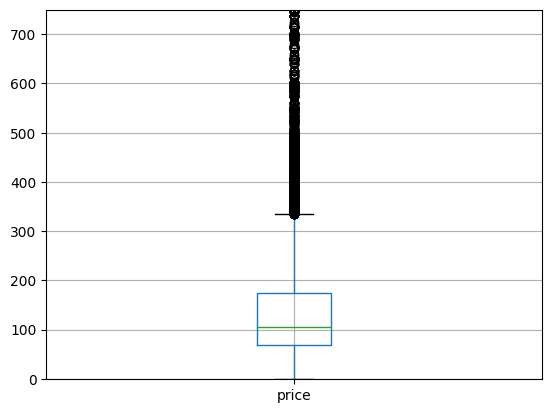

In [44]:
plot = bnb.boxplot(column = ['price'])
plot.set_ylim(-1, 750)

In [45]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)
print(xgb.score(x_test, y_test))

0.0030868523545042326


In [46]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
print(rf.score(x_test, y_test))

0.1302846447114493


In [47]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
print(gb.score(x_test, y_test))

0.19237281015048957
